## Praca domowa 4

#### Autor: Imię Nazwisko

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [10]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [11]:
dfa = df.loc[(df.NA_Sales < df.EU_Sales) & (df.Year > 2015) & (df.Publisher == "Nintendo")]
dfa

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [12]:
dfb = df.loc[(df.Year == 2010)]
dfb.sort_values("Global_Sales", ascending = False).head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [13]:
df1 = df.groupby("Genre").JP_Sales.mean().to_frame().reset_index()
df2 = df.groupby("Genre").EU_Sales.mean()
df1 = df1.merge(df2, on = "Genre")
df1.loc[df1.JP_Sales > df1.EU_Sales].rename(columns = {"Genre" : "Typ Gry", "JP_Sales" : "Średnia sprzedaż w Japonii"}).reset_index(drop = True)

,Typ Gry,Średnia sprzedaż w Japonii,EU_Sales
0,Puzzle,0.099439,0.088632
1,Role-Playing,0.238293,0.127599
2,Strategy,0.073284,0.066925


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Link do poprawianego wykresu :https://www.kaggle.com/amandaroseknudsen/globalfoodemissions/notebook

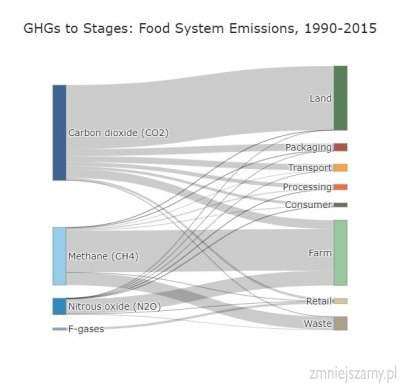


Link do poprawionego wykresu w ggplocie
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/MiszalskaNikola/Praca%20Domowa%202.pdf

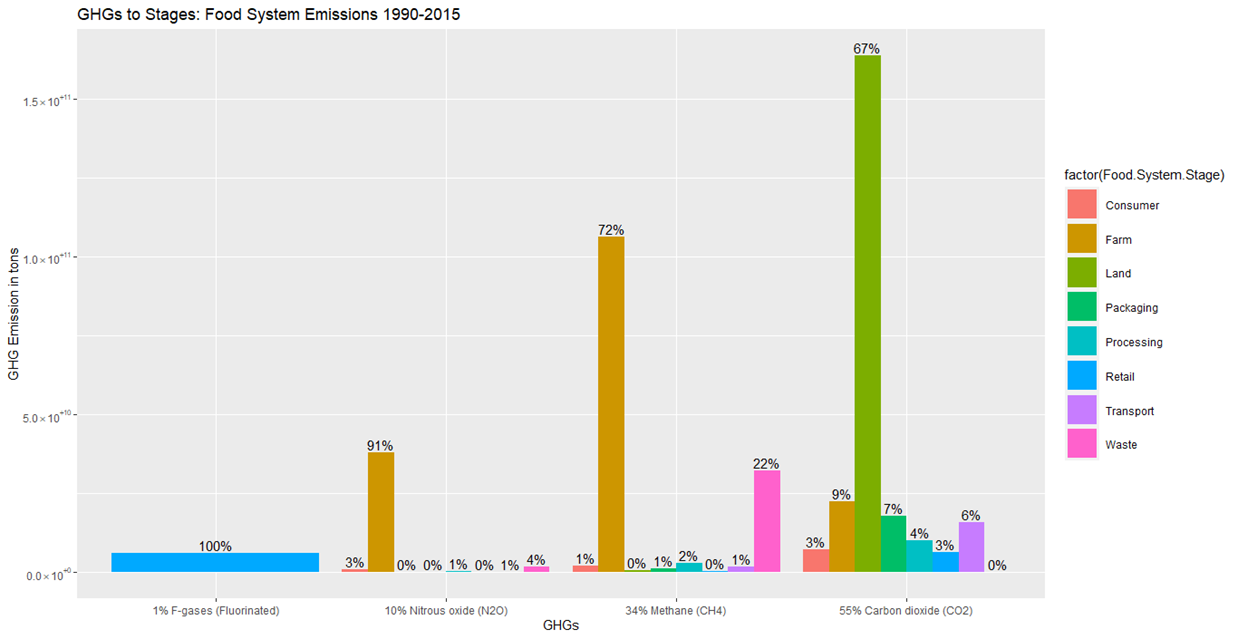


C:\Users\Nikola\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


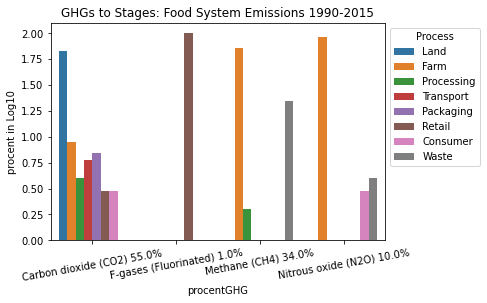

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

food = pd.read_csv('/Users/Nikola/Desktop/TWD/Praca Domowa 2 TWD/EDGARfood.csv') 
df1 = food.groupby(["GHG","FS Stage Order", "Food System Stage"])["GHG Emissions"].agg("sum").to_frame().reset_index()
df2 = food.groupby("GHG")["GHG Emissions"].sum().to_frame().reset_index()
suma = food["GHG Emissions"].sum()
wynikowa = df2.merge(df1, how= "outer", on = "GHG")
wynikowa = wynikowa.assign(procent = round(wynikowa["GHG Emissions_y"]*100/wynikowa["GHG Emissions_x"]))                    
wynikowa = wynikowa.assign(procentGHG = round(wynikowa["GHG Emissions_x"]*100/suma))
wynikowa['procentGHG'] = wynikowa["GHG"].astype(str) + " " + wynikowa['procentGHG'].astype(str) + '%'
wynikowa["procent"] = np.log10(wynikowa["procent"])

sns.barplot(data = wynikowa, x="procentGHG", y="procent", hue= "Food System Stage")
plt.ylabel('procent in Log10')
plt.legend(bbox_to_anchor=(1.0, 1.0),title="Process")
plt.xticks(rotation=10)
plt.title("GHGs to Stages: Food System Emissions 1990-2015")
plt.show()

Nowy wykres jest lepszy od pierwotnego, ponieważ można łatwo odczytać jaki procent emisji gazów cieplarnianych stanowią poszczególne gazy. Widać równiez jak poszczególne procesy przyczyniają się do emisji oraz w szczególności - widac na pirwszy rzut oka, które w ogóle procesy maja wplyw na emisję konkretnego gazu. W pierwotnym wykresie trudno porównać między sobą grubośc " lini rzepływowych" do poszczególnych procesów oraz ciężko odczytać, jaki gaz łączy się z jakimi procesami. 
W stosunku do poprzedniego wykresu poprawiłam lewitujące słupki nad osią X. Legenda ma poprawioną nazwę. Zmieniłam również skalę osi na logarytmiczną, ponieważ niektóre wartości są bardzo duże,a reszta bardzo małe, dzięki czemu aktualny wykres jest czytelniejszy.
